In [11]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [12]:
# Load the Excel file into a DataFrame
file_path = os.path.join("data", "Preprocessed_AFData.xlsx")
df = pd.read_excel(file_path)

# Print the first 10 rows of the DataFrame
df.head(10)


,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,...,data22,data23,data24,data25,data26,data27,data28,data29,data30,Control
0,0.0,0.000000,0.000000,0.100000,-0.100000,0.000000,0.000000,0.400000,0.100000,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,-0.400000,-0.600000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.954545,0.045455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.078947,-0.078947,0.210526,-0.131579,0.921053,-0.815789,-0.184211,0.000000,0.052632,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.871795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


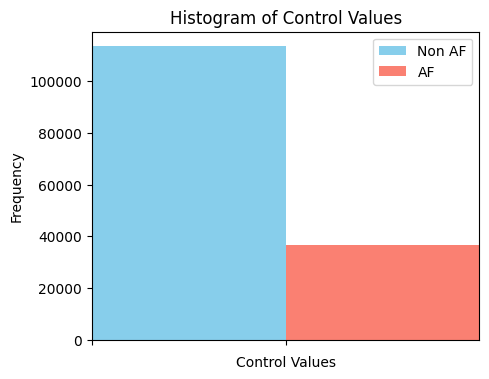

((113463, 31), (36537, 31))

In [13]:
# Separate the data into two groups based on the "Control" values
non_af = df[df['Control'] == 0]
af = df[df['Control'] == 1]
plt.figure(figsize=(5, 4))

# Plot histograms for each group
# plt.hist([non_af['Control'], af['Control']], color=['skyblue', 'salmon'], label=['Non AF', 'AF'])
plt.hist(non_af['Control'], color='skyblue', label='Non AF', width=1)
plt.hist(af['Control'], color='salmon', label='AF', width=1)

plt.xticks([0, 1], ['', ''])
plt.xlim(0,2)
# Add labels and title
plt.xlabel('Control Values')
plt.ylabel('Frequency')
plt.title('Histogram of Control Values')

# Add legend
plt.legend()

# Show plot
plt.show()
non_af.shape,af.shape

/tmp/ipykernel_8713/2655040690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  af.replace(1, "AF", inplace=True)
/tmp/ipykernel_8713/2655040690.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_af.replace(0, "Non AF", inplace=True)


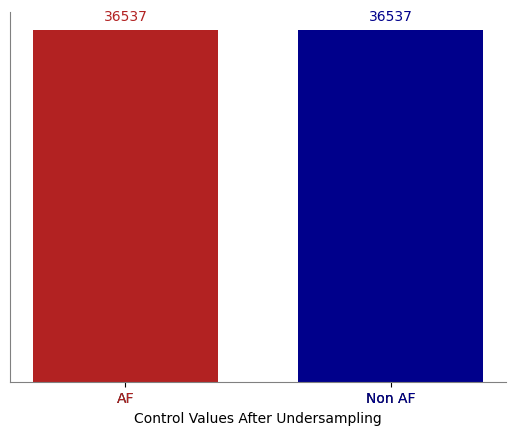

In [227]:
non_af = df[df['Control'] == 0]["Control"]
af = df[df['Control'] == 1]["Control"]

af.replace(1, "AF", inplace=True)
non_af.replace(0, "Non AF", inplace=True)


colors = ['firebrick', 'darkblue']
labels=["AF", "Non AF"]
bars = plt.bar(["AF", "Non AF"], [len(af), len(af)], align='center', color=colors, width=0.7)
plt.xlabel('Control Values After Undersampling')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Color x-axis
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_color('grey')

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, -2100, str(labels[i]), ha='center', color=colors[i])

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()+1000, str(int(bar.get_height())), ha='center', color=colors[i])


plt.gca().set_yticks([])
# plt.gca().set_xticks([])

plt.savefig('data_after.png', transparent=True)

plt.show()


The new data is created by undersampled to be the same size as "af" rows which is 36537. Then two undersampled data concatinated and shuffled.

In [14]:
# Step 1: Identify indices of majority class samples (0 values)
majority_indices = df[df['Control'] == 0].index
minority_indices = df[df['Control'] == 1]
# Step 2: Randomly select subset of indices
undersampled_indices = np.random.choice(majority_indices, size=36537, replace=False)

# Step 3: Create new DataFrame with undersampled majority class
undersampled_data = df.loc[undersampled_indices]
new_data = pd.concat([undersampled_data, minority_indices],ignore_index=True)
new_data = new_data.sample(frac=1).reset_index(drop=True)
new_data.shape

(73074, 31)

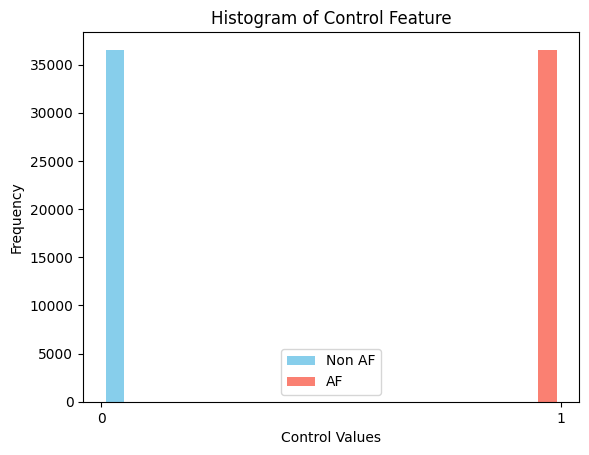

((36537, 31), (36537, 31))

In [15]:
# Separate the data into two groups based on the "Control" values
non_af = new_data[new_data['Control'] == 0]
af = new_data[new_data['Control'] == 1]

# Plot histograms for each group
plt.hist([non_af['Control'], af['Control']], bins=10, color=['skyblue', 'salmon'], label=['Non AF', 'AF'])

plt.xticks([0, 1], ['0', '1'])
# Add labels and title
plt.xlabel('Control Values')
plt.ylabel('Frequency')
plt.title('Histogram of Control Feature')

# Add legend
plt.legend()

# Show plot
plt.show()
non_af.shape,af.shape

Logistic Regression

/home/barbara/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression: 0.9286349640780021


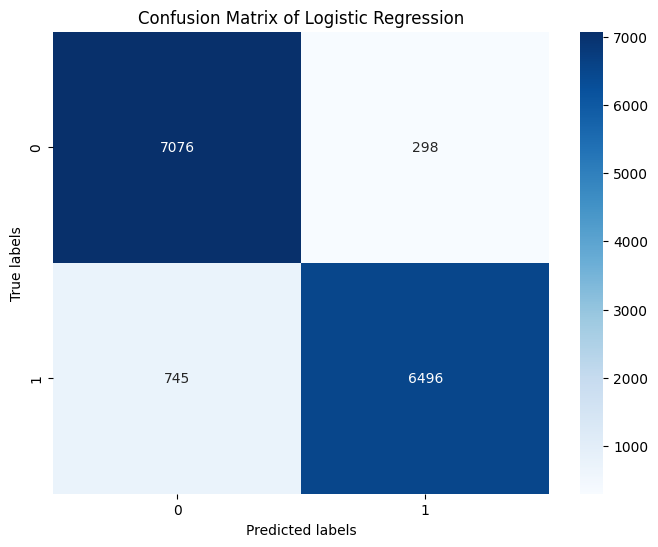

In [16]:
X = new_data.drop(columns=['Control'])
y = new_data['Control'].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the logistic regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", accuracy)
# Evaluate the model
cm = confusion_matrix(np.array(y_test), y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Adding labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Logistic Regression')

plt.show()


Decision Tree

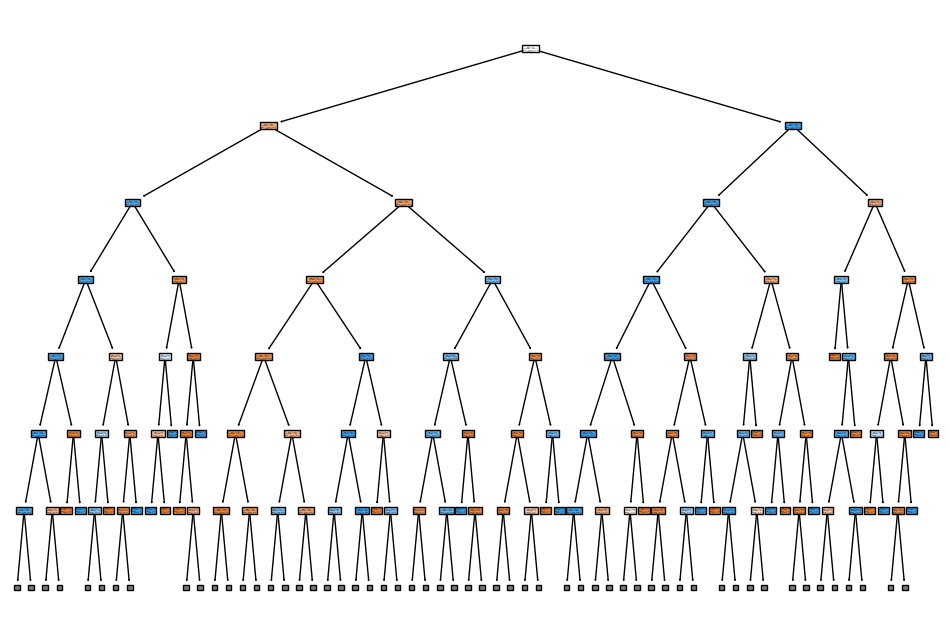

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_model = DecisionTreeClassifier(class_weight={'0': 1, '1': 25})

tree_model.fit(X_train, y_train)
feature_namesl = list(X.columns.values)
classes = list(tree_model.classes_)
plt.figure(figsize=(12, 8))
plot_tree(tree_model, feature_names=feature_namesl, class_names=classes, filled=True,max_depth=6)
plt.show()


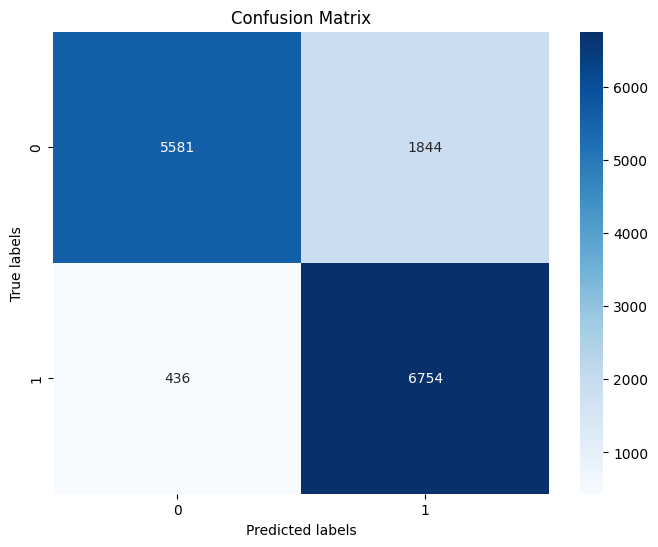

In [155]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = tree_model.predict(X_test)


cm = confusion_matrix(np.array(y_test), labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Adding labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()


In [159]:
print(436/len(labels)*100)

(5581+6754)/len(labels)*100

2.98323640095792


84.3995894628806

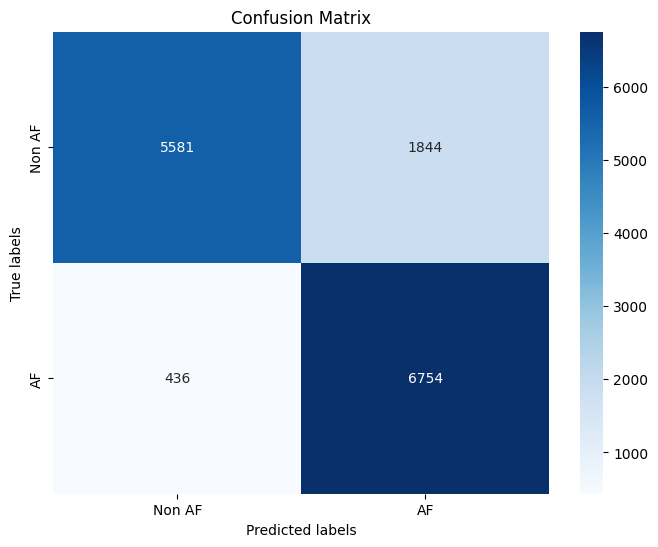

In [216]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = tree_model.predict(X_test)


cm = confusion_matrix(np.array(y_test), labels)
label = ["Non AF", "AF"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',xticklabels=["Non AF", "AF"], yticklabels=["Non AF", "AF"])
plt.savefig('matrix.png', transparent=True)


# Adding labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.savefig('matrix.png', transparent=True)

plt.show()


Naive Bayes

Accuracy of Naive Bayes: 0.7612042422169004


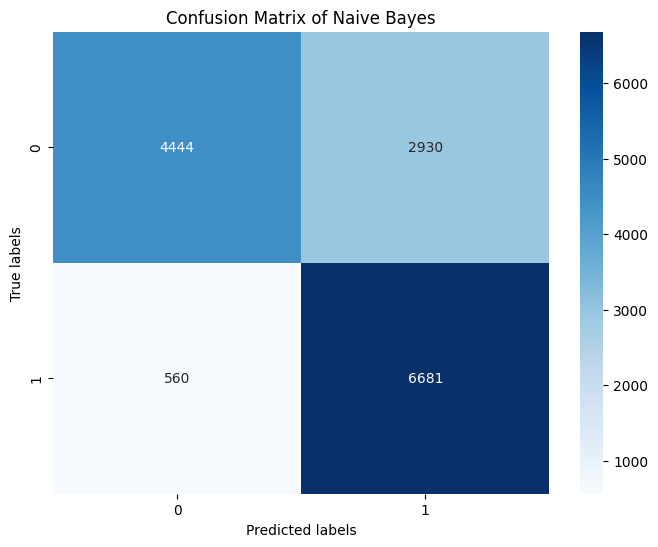

In [18]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Naive Bayes:", accuracy)
# Evaluate the model
cm = confusion_matrix(np.array(y_test), y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Adding labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Naive Bayes')

plt.show()

Support Vector Machine Model

Accuracy of linear kernel: 0.9339719466301745


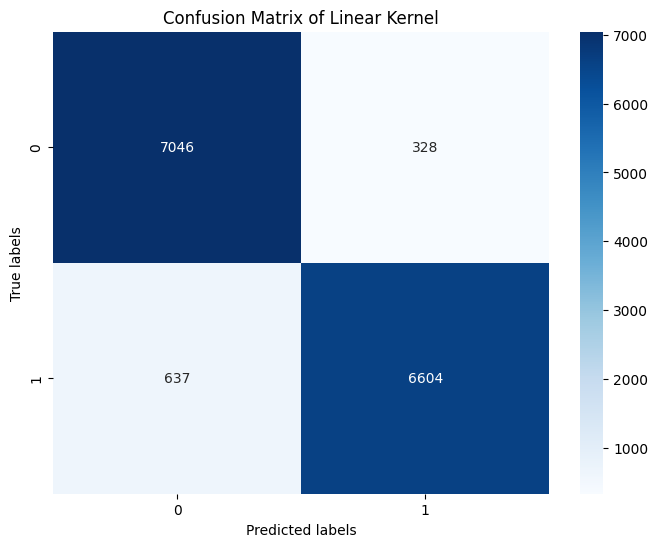

Accuracy of rbf kernel: 0.9536093055080397


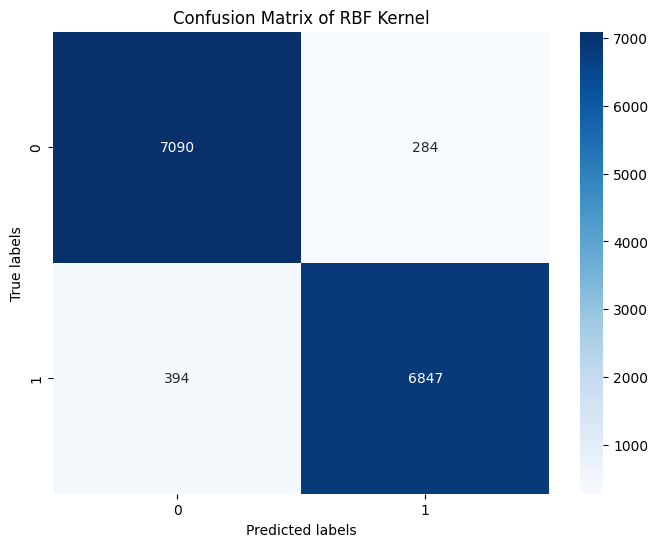

Accuracy of poly kernel: 0.9510092370851865


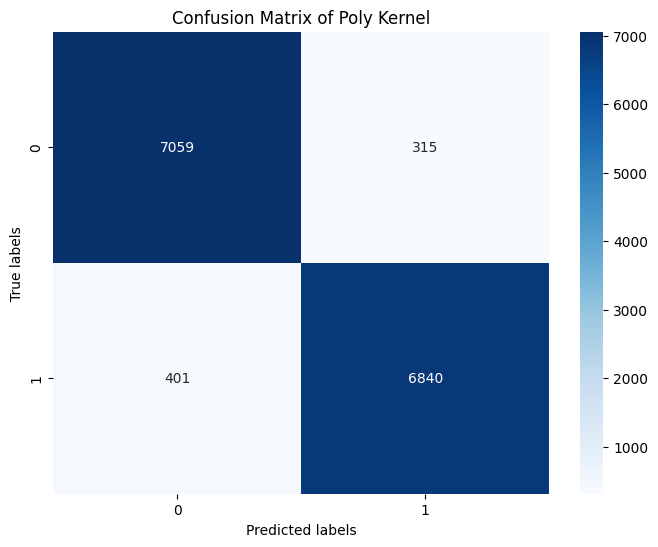

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# svm_classifier = SVC(kernel='linear')  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly')
# svm_classifier.fit(X_train, y_train)

# # Predict the labels for the new data
# y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of linear kernel:", accuracy)
cm = confusion_matrix(np.array(y_test), y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Adding labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Linear Kernel')

plt.show()

svm_classifier2 = SVC(kernel='rbf', class_weight={'0': 1, '1': 7.15})  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly')
svm_classifier2.fit(X_train, y_train)

# Predict the labels for the new data
y_pred2 = svm_classifier2.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy of rbf kernel:", accuracy2)

cm = confusion_matrix(np.array(y_test), y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Adding labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of RBF Kernel')

plt.show()

svm_classifier3 = SVC(kernel='poly')  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly')
svm_classifier3.fit(X_train, y_train)

# Predict the labels for the new data
y_pred3 = svm_classifier3.predict(X_test)

# Evaluate the model
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy of poly kernel:", accuracy3)

cm = confusion_matrix(np.array(y_test), y_pred3)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Adding labels
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Poly Kernel')

plt.show()

Cross Validation to Compare Models 

In [20]:
from sklearn.model_selection import cross_val_score

logistic_scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (logistic_scores.mean(), logistic_scores.std() * 2))

tree_scores = cross_val_score(tree_model, X, y, cv=5, scoring='accuracy')
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))

nb_classifier = cross_val_score(nb_classifier, X, y, cv=5, scoring='accuracy')
print("Naive Bayes Accuracy: %0.2f (+/- %0.2f)" % (nb_classifier.mean(), nb_classifier.std() * 2))

svm_classifier2 = cross_val_score(svm_classifier2, X, y, cv=5, scoring='accuracy')
print("Support Vector Machine Accuracy: %0.2f (+/- %0.2f)" % (svm_classifier2.mean(), svm_classifier2.std() * 2))

/home/barbara/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/barbara/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

Logistic Regression Accuracy: 0.93 (+/- 0.00)
Decision Tree Accuracy: 0.93 (+/- 0.00)
Naive Bayes Accuracy: 0.75 (+/- 0.02)
Support Vector Machine Accuracy: 0.95 (+/- 0.00)
